**Mohamed Yassine Kabouri**

`Exercice 5.1` from `Convex Optimization` Book by Vandenberghe and Boyd.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Exercice 5.1
def objective(x):
    return x**2 + 1

def inequality_constraint(x):
    return (x-2)*(x-4)

def lagrangian(x, lmbda):
    return objective(x) + lmbda*inequality_constraint(x)

def dual_function(lmbda):
    x_vals = np.linspace(1, 5, 1000)
    return np.min([lagrangian(x, lmbda) for x in x_vals])

def inequality_sensitivity_constraint(x, u):
    return inequality_constraint(x) - u

* The feasible set is the interval [(2.0, 4.0)]
* The optimal point is: x* = 2.0
* The optimal values is: p* = 5.0


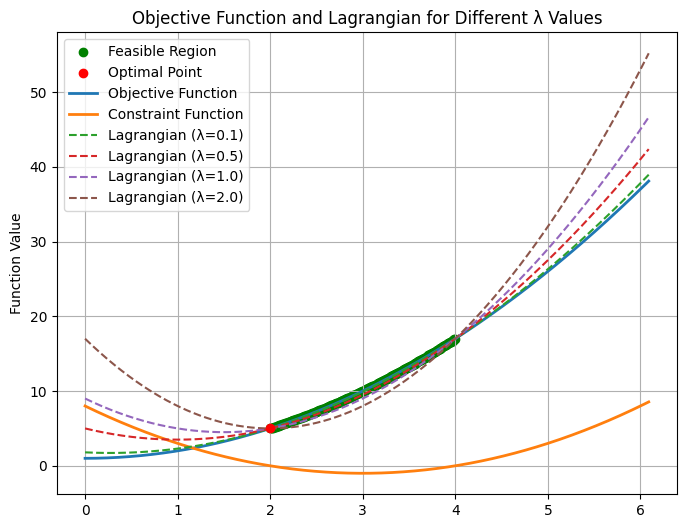

In [77]:
# Plots
points = np.arange(0, 6.1, 0.01)
lambda_values = [0.1, 0.5, 1.0, 2.0]

# Feasible points
feasible_x = points[(inequality_constraint(points) <= 0)]
feasible_y = objective(feasible_x)

print(f"* The feasible set is the interval [{feasible_x[0], feasible_x[-1]}]")

# The optimal point
x_opt = feasible_x[np.argmin(feasible_y)]
y_opt = np.min(feasible_y)

print(f"* The optimal point is: x* = {x_opt}")
print(f"* The optimal values is: p* = {y_opt}")

objective_values = objective(points)
constraint_values = inequality_constraint(points)
lagrangian_values = np.array([lagrangian(points, lmbda) for lmbda in lambda_values])

plt.figure(figsize=(8, 6))
plt.scatter(feasible_x, feasible_y, color='green', label='Feasible Region')
plt.scatter(x_opt, y_opt, color='red', label='Optimal Point', zorder=3)

plt.plot(points, objective_values, label='Objective Function', linewidth=2)
plt.plot(points, constraint_values, label='Constraint Function', linewidth=2)
for i, values in enumerate(lagrangian_values):
    plt.plot(points, values, label=f'Lagrangian (λ={lambda_values[i]})', linestyle='dashed')

plt.ylabel("Function Value")
plt.title("Objective Function and Lagrangian for Different λ Values")
plt.legend()
plt.grid()
plt.show()

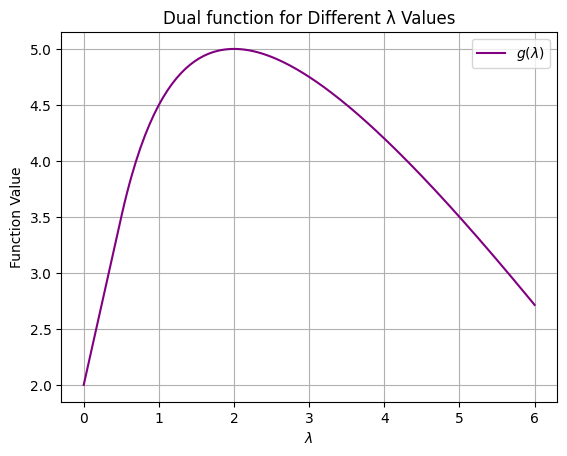

In [75]:
dual_lambdas = np.linspace(0, 6, 200)
dual_values = [dual_function(lambd) for lambd in dual_lambdas]

plt.plot(dual_lambdas, dual_values, color='purple', label='$g(\lambda)$')
plt.ylabel("Function Value")
plt.title("Dual function for Different λ Values")
plt.ylabel("Function Value")
plt.xlabel("$\lambda$")
plt.legend()
plt.grid()
plt.show()

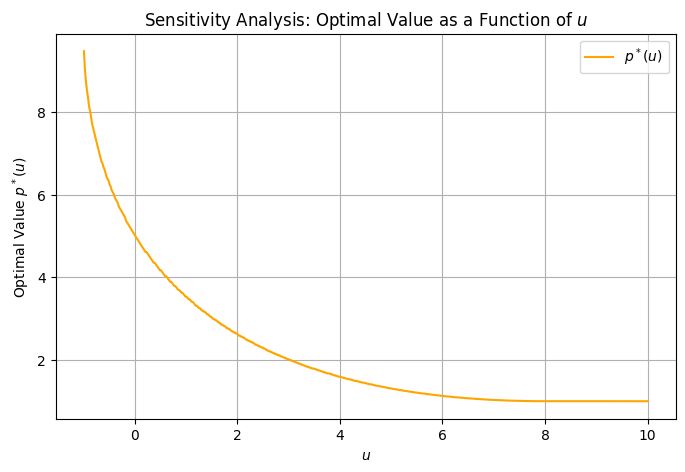

Approximate dp*(0)/du: -1.7936590909090897


In [74]:
u_values = np.linspace(-10, 10, 1000)
p_values = []
for u in u_values:
    feasible_x = points[(inequality_sensitivity_constraint(points, u) <= 0)]
    if len(feasible_x) > 0:
        p_values.append(np.min(objective(feasible_x)))
    else:
        p_values.append(np.nan)

plt.figure(figsize=(8, 5))
plt.plot(u_values, p_values, color='orange', label='$p^*(u)$')
plt.xlabel('$u$')
plt.ylabel('Optimal Value $p^*(u)$')
plt.legend()
plt.title('Sensitivity Analysis: Optimal Value as a Function of $u$')
plt.grid()
plt.show()

dp_du_approx = (p_values[505]-y_opt)/(u_values[505])
print(f"Approximate dp*(0)/du: {dp_du_approx}")